### ENSIMAG – Grenoble INP – UGA - Academic year 2024-2025
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2025-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Alexandre Wendling -- `alexandre.wendling@univ-grenoble-alpes.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP2: Principal components regression in genetics

The goal of this TP session is to use genetic markers to predict the geographical origin of a set of indians from South, Central, and North America. We propose to build two regression linear models to predict the latitude and longitude of an individual based on its genetic markers. Because the number of markers (p = 5709) is larger than the number of samples (N = 494), the predictors of the regression model will be the outputs of a principal component analysis (PCA) performed on the genetic markers. A genetic marker is encoded 1 if the individual has a mutation, 0 elsewhere.

## ▶️ Exercise 1: Data visualization (1 point)

NB: To do this exercise you will have to install packages `geopandas` and `geodatasets`.

Download dataset `NAm2.txt` from [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP2/NAm2.txt). Each row of the dataset corresponds to an individual and the columns have explicit names. The third column contains the names of the tribes to which each individual pertains. Columns 7 and 8 contain the latitude and the longitude and from Column 9 onwards are genetic markers, which are encoded are 0 or 1. Run the code described below and explain how it works.

```
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt

# Load the data
file_path = 'NAm2.txt'
df = pd.read_csv(file_path, delimiter=' ')

# Extract relevant columns
latitude = df.iloc[:, 6]
longitude = df.iloc[:, 7]
tribes = df.iloc[:, 2]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(longitude, latitude))

# Plotting
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
fig, ax = plt.subplots(figsize=(8.0, 6.5))
plt.subplots_adjust(left=0.0, right=0.90, bottom=0.10, top=0.92)
world.clip([-140, -55, -25, 75]).plot(ax=ax, color='white', edgecolor='black')
marker_list = ['o', 'v', 's']
colors_list = [f'C{i}' for i in range(9)]
for i, tribe in enumerate(gdf['Pop'].unique()):
    members_tribe = gdf[gdf['Pop'] == tribe]
    ax.scatter(members_tribe['long'], members_tribe['lat'], 
               marker=marker_list[i//9], 
               color=colors_list[i%9], label=tribe)
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax.set_title('Tribes Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
fig.show()
```

C:\Users\dev\AppData\Local\Temp\ipykernel_21148\2317975673.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


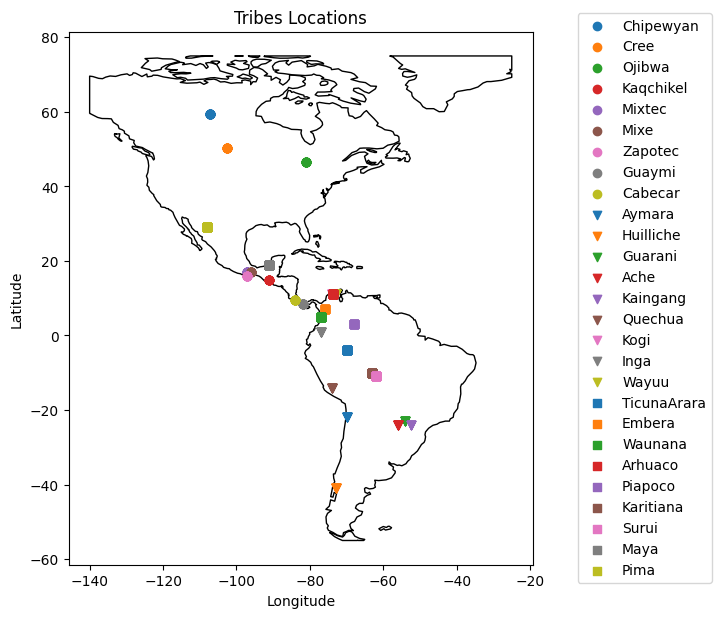

In [103]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt

# Load the data
file_path = 'NAm2.txt'
dataset = pd.read_csv(file_path, delimiter=' ')

# Extract relevant columns
latitude = dataset.iloc[:, 6]
longitude = dataset.iloc[:, 7]
tribes = dataset.iloc[:, 2]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(dataset, geometry=gpd.points_from_xy(longitude, latitude))

# Plotting
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
fig, ax = plt.subplots(figsize=(8.0, 6.5))
plt.subplots_adjust(left=0.0, right=0.90, bottom=0.10, top=0.92)
world.clip([-140, -55, -25, 75]).plot(ax=ax, color='white', edgecolor='black')
marker_list = ['o', 'v', 's']
colors_list = [f'C{i}' for i in range(9)]
for i, tribe in enumerate(gdf['Pop'].unique()):
    members_tribe = gdf[gdf['Pop'] == tribe]
    ax.scatter(members_tribe['long'], members_tribe['lat'], 
               marker=marker_list[i//9], 
               color=colors_list[i%9], label=tribe)
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax.set_title('Tribes Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
fig.show()

## ▶️ Exercise 2: Multiple linear regression (2 points)

Using **only** the genetic markers as predictors, you will estimate a multiple linear regression model to predict the longitude of each individual.

You will proceed in several steps.

**(a)** First, try to estimate the coefficients of the multiple linear regression using the expression seen in class 

$$\hat{\beta} = (X^\top X)^{-1}X^\top y$$

You should proceed as we did in TP1 using `numpy.linalg.solve` to obtain the values of $\beta$. 

Did you run into any errors? What is going on? Relate your answer to the fact that $\text{rank}(X) < p$, where $X \in R^{N*p}$ is the data matrix.

In [104]:
X = dataset.drop(columns=['IndivID', 'PopID', 'Pop', 'Country', 'Continent', 'sex', 'lat', 'long'])

X = np.hstack([np.ones((dataset.shape[0], 1)), X.to_numpy()])

y = longitude

In [105]:
import numpy as np

def calculate_parameters(x, y):
    return np.linalg.solve(x.T @ x, x.T @ y)

beta = calculate_parameters(X, y)

LinAlgError: Singular matrix

We run into an error `LinAlgError: Singular matrix`. This indicates that $X^TX$ is not inversible. 

This can be explained as follow : 

We know that for two matrixes $A$ and $B$ : $rg(AB) \leq min(rg(A), rg(B))$

So $rg(X^TX) \leq rg(X)$

but, because in our dataset some columns are identical, we have $rg(X) < p$ and knowing that $X^TX \in M_p(\mathbb{R})$ we can conclude that $X^TX$ is not inversible

**(b)** Use function `numpy.linalg.lstsq` to estimate the coefficients (it may take a few seconds to get a result). 

And now? Did you get any errors? Why is that? 

Relate your answer to the difference between functions `numpy.linalg.solve` and `numpy.linalg.lstsq`.

You can check the documention for both functions as well as [this](https://netlib.org/lapack/lug/node27.html) link for more information.

In [106]:
def calculate_parameters_lstsq(x, y):
    return np.linalg.lstsq(x.T @ x, x.T @ y)

beta = calculate_parameters_lstsq(X, y)

print(f"Coefficients : {beta[0]}")

Coefficients : [-0.47674258 -0.04005413 -0.01943802 ... -0.2157905  -0.10203467
  0.01814151]


This function uses the singular value decomposition to find an approximated numerical solution to a equation system.

 **(c)** We will now use `sklearn` to do our linear regression with the help of class `sklearn.linear_model.LinearRegression` whose documentation is available [here](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html). Note that every estimator from `sklearn` has a `fit` and a `predict` method, which are used to calculate coefficients and predict values (see [here](https://scikit-learn.org/stable/getting_started.html#fitting-and-predicting-estimator-basics) for more info). In our current case, we can do:

```
# select only the genetic markers as predictors
predictors = df.columns[8:]
# create the design matrix
X = df[predictors].values
# get the observed values to predict
y = df['long']
# fit a multiple linear regression model
lr = LinearRegression()
lr.fit(X, y)
```

You should not run into errors now, since `sklearn` also uses `lstsq` to solve the normal equations, as shown [here](https://github.com/scikit-learn/scikit-learn/blob/d666202a9349893c1bd106cc9ee0ff0a807c7cf3/sklearn/linear_model/_base.py#L682) (though it uses the `scipy` implementation instead of the `numpy` for "historical" reasons). Check the values of the estimated coefficients stored as an attribute in `lr.coef_`, are they the same as the ones obtained in item **(b)**? Probably not. This is because `sklearn` re-centers the predictors before estimating the coefficients of the linear regression, as shown [here](https://github.com/scikit-learn/scikit-learn/blob/d666202a9349893c1bd106cc9ee0ff0a807c7cf3/sklearn/linear_model/_base.py#L622). What would be a practical reason for doing such re-centering systematically? Hint: it has to do with how to interpret the intercept of the model. 

In [107]:
from sklearn.linear_model import LinearRegression

X = dataset.drop(columns=['IndivID', 'PopID', 'Pop', 'Country', 'Continent', 'sex', 'lat', 'long'])

lr = LinearRegression()
lr.fit(X, longitude)

print("Coefficients : ", lr.coef_)
print("Intercept (bêta 0):", lr.intercept_)

Coefficients :  [-0.03940988 -0.0245272   0.01089763 ...  0.04804479 -0.08985062
  0.01903025]
Intercept (bêta 0): -84.0104040930601


As expected, the coefficients we got are different with this new method.

If we do not center the predictors before building our model, we can interpret $β_0$​ as the predicted value for a sample in which all predictor variables are equal to zero. However, if we do center the predictors, then $β_0$​ represents the predicted value for an "average" sample, where each predictor is at its mean.

Note: In our case, interpreting $β_0$​ as the prediction for an average sample is not particularly meaningful, since a human being either has or does not have a genetic marker and there is no such thing as partially having one.

## ▶️ Exercise 3: Principal components analysis (5 points)

**(a)** Explain in a few words the main concepts and ideas underlying the principal component analysis (PCA). You should include both the geometric and statistical interpretations of PCA.

The main idea of PCA is to transform the original predictors into new ones, expressed as linear combinations of the old predictors. The goal is to reduce the dimensionality of the dataset while minimizing the loss of information associated with this reduction.

Let's consider a dataset $X \in M_{n,p}(\mathbb{R})$, where $n$ represents the number of observations and $p$ the number of predictors.

The vector $u_1$, which defines the coefficients of the linear combination forming the first principal component, satisfies the following equation:

$$
u_1 = Argmax_{u \in \mathbb{R}^p, \|u\|=1} \text{Var}(Xu)
$$

**Note:** Here, the function $\text{Var}$ refers to the empirical variance.

The variance of $Xu$ is given by:

$$
\text{Var}(Xu) = \frac{1}{n} \sum_{i=1}^{n} (X_i u)^2 = u^T S u
$$

where $X_i$ represents the $i$-th observation and $S$ is the covariance matrix of $X$.

Thus, our objective is to maximize $u^T S u$ subject to the constraint $\|u\| = 1$. This is equivalent to finding the **largest eigenvalue** of $S$, with $u$ being the corresponding normalized eigenvector.

Therefore, the first principal component $u_1$ is the eigenvector of $S$ associated with its largest eigenvalue, normalized to satisfy $\|u_1\| = 1$.


The vector $u_1$ of the coefficients of the linear combination giving the first principal component satisfies the following equation : 

$$u_1 = argmax_{u}(Var(Xu))$$

**(b)** Use the estimator defined in `sklearn.decomposition.PCA` to do a PCA on the dataset. Plot the first two dimensions of the projected data points on a scatterplot. The scattered points should have different markers and colors depending on which tribe they belong to. You can use the same color/marker style from **Exercise 2** or propose a new one.

C:\Users\dev\AppData\Local\Temp\ipykernel_21148\139427168.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(tribes))


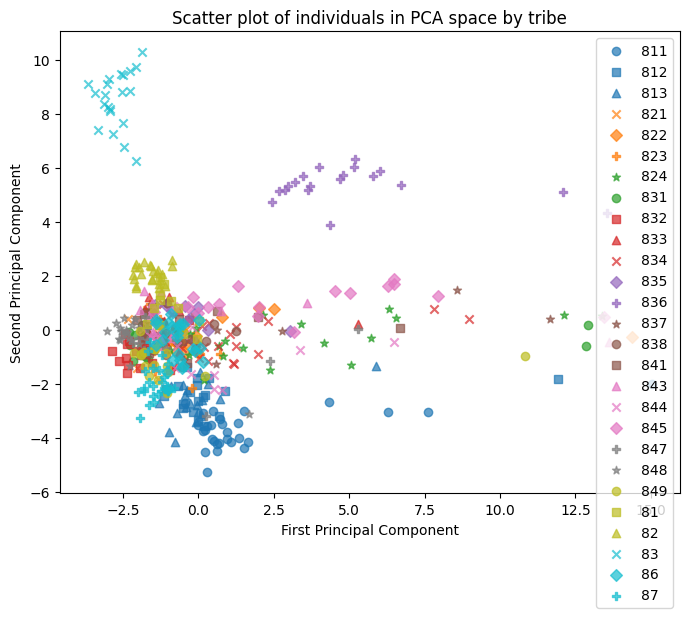

In [152]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_transform(X):
    pca = PCA()
    X_PCA = pca.fit_transform(X)
    return X_PCA, pca

X = dataset.drop(columns=['IndivID', 'PopID', 'Pop', 'Country', 'Continent', 'sex', 'lat', 'long'])

X_pca, pca = pca_transform(X)

def plot_first_components(X_pca):
    plt.figure(figsize=(8, 6))

    tribes = dataset['PopID'].unique()
    markers = ['o', 's', '^', 'x', 'D', 'P', '*'] 
    colors = plt.cm.get_cmap("tab10", len(tribes))

    for i, tribe in enumerate(tribes):
        mask = (dataset['PopID'] == tribe)
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                label=tribe, marker=markers[i % len(markers)], 
                color=colors(i), alpha=0.7)

    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    plt.title("Scatter plot of individuals in PCA space by tribe")
    plt.legend()
    plt.show()


plot_first_components(X_pca)

**(c)** Remember from our class that the results of PCA are affected when pre-processing transformations are applied to the data. We will illustrate this using `sklearn.preprocessing.StandardScaler` as per:
```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
```
Redo the 2D scatter plot from item **(b)** on the normalized version of the datast. How does it compare to your previous plot?

C:\Users\dev\AppData\Local\Temp\ipykernel_21148\139427168.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(tribes))


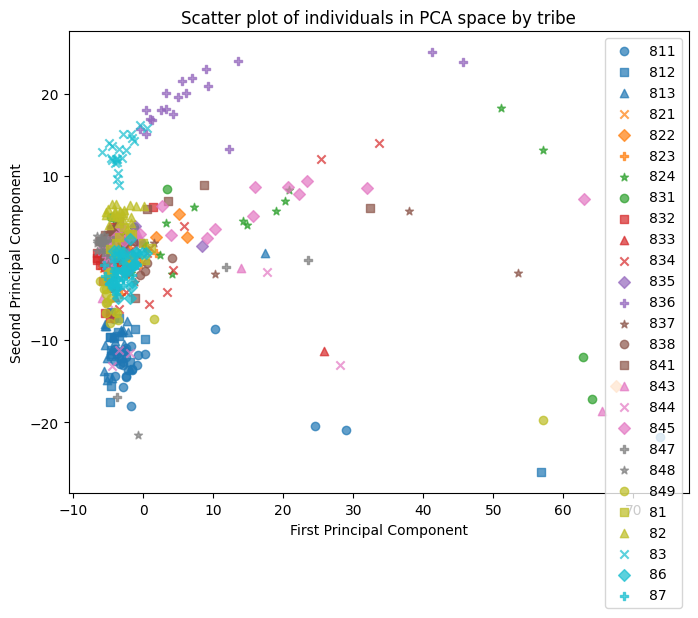

In [153]:
scaler = StandardScaler()
X = dataset.drop(columns=['IndivID', 'PopID', 'Pop', 'Country', 'Continent', 'sex', 'lat', 'long'])
X_scaled = scaler.fit_transform(X)

X_scaled_pca, pca_scaled = pca_transform(X_scaled)

plot_first_components(X_scaled_pca)

**(d)** Given the results in **(b)** and **(c)**, what can you conclude regarding the necessity of standardizing the data points for the dataset consider in this TP?

Visually, the first model appears to provide a clearer separation of the tribes. This is likely because all predictors are binary (0 or 1), meaning they are already on the same scale. As a result, rescaling does not contribute to improving the PCA results and may even distort the natural variance structure of the data.

**(e)** Which percentage of variance is captured by the first two principal components? How many principal components would you keep if you would like to represent the genetic markers using a minimal number of principal components? To help answering this question, you can use a plot showing the cumulative percentage of variance as a function of the number of principal components.

0.03568444524213921


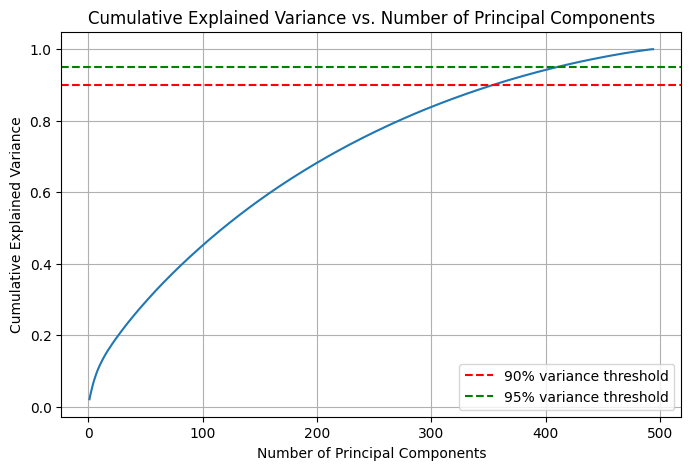

In [154]:
explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance_ratio)

print(cumulative_variance[1])

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, linestyle='-')
plt.axhline(y=0.9, color='r', linestyle='--', label="90% variance threshold")
plt.axhline(y=0.95, color='g', linestyle='--', label="95% variance threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Principal Components")
plt.legend()
plt.grid()
plt.show()

The first two principal components explain $3.57$% of the variance in the dataset and keeping the $400$ first principal components would allow to explain $95$% of the variance. In conclusion, keeping $400$ would allow to to represent the genetic markers while reducing the dimensionality by $93$%.

## ▶️ Exercise 4: Principal components regression (4 points)

**(a)** Predict the latitude and the longitude of all points from the dataset using the scores of the first 250 PCA axes. Plot the predicted spatial coordinates using the same style and structure from **Exercise 1** and compare the results from each plot. What can you conclude? Does the new map illustrate somehow too optimistically (or too pessimistically) the ability to find geographical origin of individuals outside the database from its genetic markers? Justify your answer.

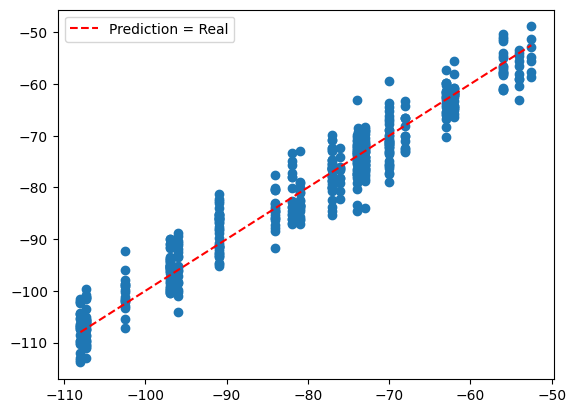

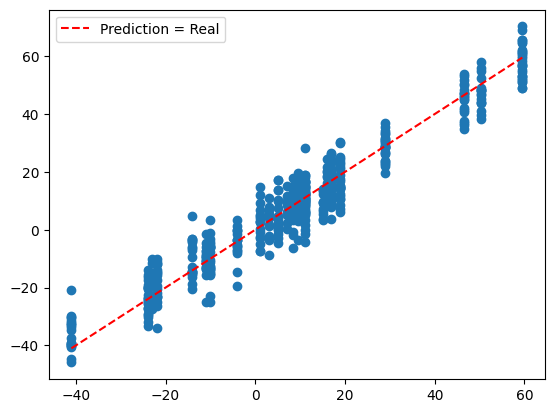

In [155]:
X_pca = X_pca[:, :250]

lr_long = LinearRegression()
y = dataset.filter(items=['long', 'lat'])
lr_long.fit(X_pca, y)

y_pred = lr_long.predict(X_pca)


def print_predicted_vs_actual(y_pred, y):
    x_vals = np.linspace(min(y), max(y), 100)
    plt.plot(x_vals, x_vals, color="red", linestyle="--", label="Prediction = Real")

    plt.scatter(y, y_pred)
    plt.legend()
    plt.show()

print_predicted_vs_actual(y_pred[:, 0], longitude)
print_predicted_vs_actual(y_pred[:, 1], latitude)

**(b)** Quantify the error of the linear regression model using the mean distance between real and predicted coordinates. Beware to use `sklearn.metrics.pairwise.haversine_distances` so to correctly measure the distances between points so to take into account the curvature of the Earth. Your answer should be given in kilometers.

In [156]:
from sklearn.metrics.pairwise import haversine_distances

real_coords = np.radians(np.column_stack((latitude, longitude)))
predicted_coords = np.radians(np.column_stack((y_pred[:, 1], y_pred[:, 0])))

distances = haversine_distances(real_coords, predicted_coords) * 6371  # (Earth radius = 6371 km)

print(f"Mean prediction error (in km): {np.mean(np.diag(distances)):.2f}")

Mean prediction error (in km): 640.38


## ▶️ Exercise 5: PCR and cross-validation (6 points)

Our goal now is to build the best model to predict individual geographical coordinates. 

For this, you will run a linear regression to predict latitudes and longitudes. Note that `sklearn.linear_model.LinearRegression` can naturally handle the fact of having two sets of coefficients. We will use ten-fold cross-validation to helps us choose the number of principal axes that we should keep. You should report the errors in terms of kilometers as done in **Exercise 4(b)**.

**(a)** Recall in a few words the principle of cross-validation. Explain why this procedure is useful when building a predictive model. Your answer should mention different strategies to handle datasets in which the samples are not IID.

Cross-validation (CV) is a technique used to evaluate the generalization performance of a predictive model. Instead of using a single train-test split, CV divides the dataset into multiple subsets, training the model on some subsets while testing it on the remaining ones. For example the K-fold cross-validation divides the dataset in $k$ subsets, we then train a predictive model with a datasets composed with $k - 1$ subsets and we evaluate its performance on the remaining samples. Finally, we repeat this process $k$ times in total to use every subset as the test subset.

**(b)** Based on the structure of the dataset being used, such as the different countries of the individuals and the order in which the rows of the dataframe are provided, explain which choice of cross-validation iterator from [here](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators) seems the most adequate for our context.

Given the structure of our dataset—where individuals belong to tribes that share the same latitude and longitude, and where different tribes can exist within the same country—the most appropriate cross-validation strategy is Group K-Fold, using the tribe as the grouping variable.

By ensuring that all individuals from the same tribe are placed entirely in either the training set or the validation set, we effectively test the model's ability to predict the coordinates of a previously unseen tribe. This approach prevents data leakage, ensures a more realistic evaluation of generalization performance, and accounts for potential spatial correlations within the dataset.

**(c)** We first assess the quality of the PCR fit for `n_components=4`. Note that you should be careful in avoiding [data leakage](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage) problems when doing the PCA followed by a multiple linear regression. You should use the pipeline interface from scikit-learn with `sklearn.pipeline.make_pipeline` to facilitate your task. Be sure to evaluate the errors as done in **Exercise 4(b)**.

In [162]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error, r2_score

def cross_validation(n_component, n_splits):
    group_kfold = GroupKFold(n_splits=n_splits)

    pcr_pipeline = make_pipeline(PCA(n_components=n_component), LinearRegression())

    X = dataset.drop(columns=['IndivID', 'PopID', 'Pop', 'Country', 'Continent', 'sex', 'lat', 'long'])
    y = dataset.filter(items=['long', 'lat'])

    rmse_scores_long, rmse_scores_lat  = [], []
    r2_scores_long, r2_scores_lat = [], []
    distances = []

    for train_idx, test_idx in group_kfold.split(X, y, groups=dataset['PopID']):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        pcr_pipeline.fit(X_train, y_train)
        y_pred = pcr_pipeline.predict(X_test)

        rmse_long = np.sqrt(mean_squared_error(y_test['long'], y_pred[:, 0]))
        r2_long = r2_score(y_test['long'], y_pred[:, 0])
        rmse_lat = np.sqrt(mean_squared_error(y_test['lat'], y_pred[:, 1]))
        r2_lat = r2_score(y_test['lat'], y_pred[:, 1])

        rmse_scores_long.append(rmse_long)
        r2_scores_long.append(r2_long)
        rmse_scores_lat.append(rmse_lat)
        r2_scores_lat.append(r2_lat)

        real_coords = np.radians(np.column_stack((y_test['lat'], y_test['long'])))
        predicted_coords = np.radians(np.column_stack((y_pred[:, 1], y_pred[:, 0])))

        distances.append(np.mean(haversine_distances(real_coords, predicted_coords) * 6371))

    return np.mean(rmse_scores_long), np.mean(r2_scores_long), np.mean(rmse_scores_lat), np.mean(r2_scores_lat), np.mean(distances)

cv = cross_validation(4, 10)

print(f"Average RMSE for Longitute : {cv[0]}\nAverage R-Squared for Longitute : {cv[1]}\n")
print(f"Average RMSE for Latitude : {cv[2]}\nAverage R-Squared for Latitude : {cv[3]}\n")
print(f"Average Distance Error (in km) : {cv[4]}")

Average RMSE for Longitute : 13.574494256403892
Average R-Squared for Longitute : -3.1721374831642777

Average RMSE for Latitude : 20.048159239207386
Average R-Squared for Latitude : -1.915049566669559

Average Distance Error (in km) : 2583.9437848868897


**(d)** Repeat the analysis from item **(b)** but changing `n_components` between 2 and 440 in steps of 10. Plot the mean training and test errors versus the number of principal components. Attention, the errors should be given in kilometers.

In [ ]:
results = [cross_validation(2, 20)]
n_components = [2]

for i in range(10, 440, 10):
    results.append(cross_validation(i, 20))
    n_components.append(i)

distances = [result[-1] for result in results]

plt.plot(n_components, distances)
plt.show()

**(e)** Which model would you keep? What is the prediction error for this model? Compare it with its corresponding training error. Plot the predicted coordinates on a map as in **Exercise 4(a)**. What can you conclude?

It seems that the best model is the one using the 140 first principal components.

In [145]:
n_splits = 10
group_kfold = GroupKFold(n_splits=n_splits)

pcr_pipeline = make_pipeline(PCA(n_components=140), LinearRegression())

X = dataset.drop(columns=['IndivID', 'PopID', 'Pop', 'Country', 'Continent', 'sex', 'lat', 'long'])

rmse_scores = []
r2_scores = []
distances_test, distances_train = [], []


for train_idx, test_idx in group_kfold.split(X, y, groups=dataset['PopID']):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    longitude_train, longitude_test = longitude.iloc[train_idx], longitude.iloc[test_idx]
    latitude_train, latitude_test = latitude.iloc[train_idx], latitude.iloc[test_idx]

    pcr_pipeline.fit(X_train, longitude_train)
    long_pred = pcr_pipeline.predict(X_test)
    long_pred_train = pcr_pipeline.predict(X_train)

    pcr_pipeline.fit(X_train, latitude_train)
    lat_pred = pcr_pipeline.predict(X_test)
    lat_pred_train = pcr_pipeline.predict(X_train)


    real_coords = np.radians(np.column_stack((longitude_test, latitude_test)))
    predicted_coords = np.radians(np.column_stack((lat_pred, long_pred)))

    distances_test.append(np.mean(haversine_distances(real_coords, predicted_coords) * 6371))

    real_coords = np.radians(np.column_stack((longitude_train, latitude_train)))
    predicted_coords = np.radians(np.column_stack((lat_pred_train, long_pred_train)))

    distances_train.append(np.mean(haversine_distances(real_coords, predicted_coords) * 6371))

print(f"Distance test : {np.mean(distances_test)}")
print(f"Distance train : {np.mean(distances_train)}")
    

Distance test : 10333.831492949972
Distance train : 10376.418734066849


## ▶️ Exercise 6: Conclusion (2 points)

Propose a conclusion to your study. You can write a paragraph about the quality of predictors versus the number of factors, possible improvements to the approach (for instance, showing what happens when using [partial least squares](https://scikit-learn.org/1.5/auto_examples/cross_decomposition/plot_pcr_vs_pls.html) instead of PCR), comment on the performance of the regression in predictions for each country separately, etc. Note that we expect a thorough presentation of the final predictive model as well as an interpretation of it, not simply a bunch of `python` code lines.